In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import itertools


In [2]:


with open("vetting_playlist.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Inspect the type of data
print(type(data))


tdf = pd.json_normalize(data)
tdf.info()

tdftracks=[]
for i in tdf['tracks.items']:
    tdftracks.append(i)

<class 'dict'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   collaborative                1 non-null      bool  
 1   description                  1 non-null      object
 2   href                         1 non-null      object
 3   id                           1 non-null      object
 4   images                       1 non-null      object
 5   name                         1 non-null      object
 6   primary_color                0 non-null      object
 7   public                       1 non-null      bool  
 8   snapshot_id                  1 non-null      object
 9   type                         1 non-null      object
 10  uri                          1 non-null      object
 11  external_urls.spotify        1 non-null      object
 12  followers.href               0 non-null      object
 13  followers.total         

In [3]:
tdf.head()

,collaborative,description,href,id,images,name,primary_color,public,snapshot_id,type,uri,external_urls.spotify,followers.href,followers.total,owner.display_name,owner.external_urls.spotify,owner.href,owner.id,owner.type,owner.uri,tracks.href,tracks.items,tracks.limit,tracks.next,tracks.offset,tracks.previous,tracks.total
0,False,,https://api.spotify.com/v1/playlists/0bw8158RM...,0bw8158RM7roegphH1GYCx,"[{'height': 640, 'url': 'https://mosaic.scdn.c...",Vetting,None,True,AAABIJSLYfVS0G/X1DWMDI3nNNKm6xlu,playlist,spotify:playlist:0bw8158RM7roegphH1GYCx,https://open.spotify.com/playlist/0bw8158RM7ro...,None,1,Sonia,https://open.spotify.com/user/1225630715,https://api.spotify.com/v1/users/1225630715,1225630715,user,spotify:user:1225630715,https://api.spotify.com/v1/playlists/0bw8158RM...,"[{'added_at': '2017-06-23T23:21:59Z', 'added_b...",100,https://api.spotify.com/v1/playlists/0bw8158RM...,0,None,146


In [4]:
ttracks=pd.DataFrame(tdftracks)

In [5]:
ttracks.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145
0,"{'added_at': '2017-06-23T23:21:59Z', 'added_by...","{'added_at': '2017-04-21T17:02:44Z', 'added_by...","{'added_at': '2017-06-12T22:46:03Z', 'added_by...","{'added_at': '2017-04-15T00:53:05Z', 'added_by...","{'added_at': '2017-06-29T23:13:06Z', 'added_by...","{'added_at': '2017-04-15T00:54:34Z', 'added_by...","{'added_at': '2017-04-15T00:55:17Z', 'added_by...","{'added_at': '2017-04-15T00:58:29Z', 'added_by...","{'added_at': '2017-07-22T19:07:37Z', 'added_by...","{'added_at': '2017-09-06T02:44:13Z', 'added_by...","{'added_at': '2017-09-06T03:05:32Z', 'added_by...","{'added_at': '2017-09-10T00:19:42Z', 'added_by...","{'added_at': '2017-09-12T17:47:54Z', 'added_by...","{'added_at': '2017-09-12T18:26:44Z', 'added_by...","{'added_at': '2017-10-06T05:31:16Z', 'added_by...","{'added_at': '2017-10-21T02:37:01Z', 'added_by...","{'added_at': '2017-10-25T04:26:31Z', 'added_by...","{'added_at': '2017-10-25T04:46:30Z', 'added_by...","{'added_at': '2017-10-25T04:54:45Z', 'added_by...","{'added_at': '2017-10-25T04:57:27Z', 'added_by...","{'added_at': '2017-10-26T02:18:40Z', 'added_by...","{'added_at': '2017-10-26T02:26:38Z', 'added_by...","{'added_at': '2017-10-27T04:50:56Z', 'added_by...","{'added_at': '2017-10-31T17:48:15Z', 'added_by...","{'added_at': '2017-11-02T16:42:33Z', 'added_by...","{'added_at': '2017-11-02T17:02:37Z', 'added_by...","{'added_at': '2017-11-02T17:09:27Z', 'added_by...","{'added_at': '2017-11-20T21:09:33Z', 'added_by...","{'added_at': '2017-12-01T18:34:55Z', 'added_by...","{'added_at': '2017-12-03T22:36:07Z', 'added_by...","{'added_at': '2017-12-05T18:50:45Z', 'added_by...","{'added_at': '2017-12-07T02:36:02Z', 'added_by...","{'added_at': '2017-12-19T19:11:13Z', 'added_by...","{'added_at': '2017-12-19T19:25:13Z', 'added_by...","{'added_at': '2018-03-08T06:19:10Z', 'added_by...","{'added_at': '2018-04-30T20:02:03Z', 'added_by...","{'added_at': '2018-05-03T00:17:31Z', 'added_by...","{'added_at': '2018-05-03T00:58:24Z', 'added_by...","{'added_at': '2018-05-18T01:21:44Z', 'added_by...","{'added_at': '2018-05-18T01:30:18Z', 'added_by...","{'added_at': '2018-05-19T05:56:50Z', 'added_by...","{'added_at': '2018-05-19T05:56:58Z', 'added_by...","{'added_at': '2018-05-20T21:43:19Z', 'added_by...","{'added_at': '2018-05-20T22:08:42Z', 'added_by...","{'added_at': '2018-05-20T22:25:16Z', 'added_by...","{'added_at': '2018-05-20T23:54:54Z', 'added_by...","{'added_at': '2018-06-14T18:29:45Z', 'added_by...","{'added_at': '2018-07-13T23:17:11Z', 'added_by...","{'added_at': '2018-08-15T02:39:19Z', 'added_by...","{'added_at': '2018-08-25T19:45:02Z', 'added_by...","{'added_at': '2018-08-25T20:18:19Z', 'added_by...","{'added_at': '2018-08-27T01:17:09Z', 'added_by...","{'added_at': '2018-09-07T22:30:34Z', 'added_by...","{'added_at': '2018-12-12T18:04:04Z', 'added_by...","{'added_at': '2019-01-26T01:22:39Z', 'added_by...","{'added_at': '2019-01-29T00:08:45Z', 'added_by...","{'added_at': '2019-03-08T04:04:34Z', 'added_by...","{'added_at': '2019-03-08T04:12:00Z', 'added_by...","{'added_at': '2019-03-12T05:38:59Z', 'added_by...","{'added_at': '2019-05-26T01:36:17Z', 'added_by...","{'added_at': '2019-06-18T14:24:50Z', 'added_by...","{'added_at': '2019-09-30T03:35:27Z', 'added_by...","{'added_at': '2019-10-03T16:45:10Z', 'added_by...","{'added_at': '2019-10-03T16:51:12Z', 'added_by...","{'added_at': '2019-10-08T19:05:38Z', 'added_by...","{'added_at': '2019-10-09T16:50:55Z', 'added_by...","{'added_at': '2019-10-16T19:03:23Z', 'added_by...","{'added_at': '2019-11-05T03:39:10Z', '

In [6]:
ttracks=ttracks.T

In [7]:
ttracks.head()

,0
0,"{'added_at': '2017-06-23T23:21:59Z', 'added_by..."
1,"{'added_at': '2017-04-21T17:02:44Z', 'added_by..."
2,"{'added_at': '2017-06-12T22:46:03Z', 'added_by..."
3,"{'added_at': '2017-04-15T00:53:05Z', 'added_by..."
4,"{'added_at': '2017-06-29T23:13:06Z', 'added_by..."


In [8]:
ttracks = ttracks[0].apply(pd.Series)
ttracks.head()

,added_at,added_by,is_local,primary_color,track,video_thumbnail
0,2017-06-23T23:21:59Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'preview_url': None, 'available_markets': [],...",{'url': None}
1,2017-04-21T17:02:44Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'preview_url': None, 'available_markets': [],...",{'url': None}
2,2017-06-12T22:46:03Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'preview_url': None, 'available_markets': ['A...",{'url': None}
3,2017-04-15T00:53:05Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'preview_url': None, 'available_markets': [],...",{'url': None}
4,2017-06-29T23:13:06Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'preview_url': None, 'available_markets': [],...",{'url': None}


In [9]:
ttracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   added_at         146 non-null    object
 1   added_by         146 non-null    object
 2   is_local         146 non-null    bool  
 3   primary_color    0 non-null      object
 4   track            146 non-null    object
 5   video_thumbnail  146 non-null    object
dtypes: bool(1), object(5)
memory usage: 6.0+ KB


In [10]:
actual_tracks = ttracks['track'].apply(pd.Series)
actual_tracks.head()

,preview_url,available_markets,explicit,type,episode,track,album,artists,disc_number,track_number,duration_ms,external_ids,external_urls,href,id,name,popularity,uri,is_local
0,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,3,215879,{'isrc': 'USFMT1406103'},{'spotify': 'https://open.spotify.com/track/0N...,https://api.spotify.com/v1/tracks/0NSEZeWHkYCk...,0NSEZeWHkYCknk1nAVO1Fh,Better Than,0,spotify:track:0NSEZeWHkYCknk1nAVO1Fh,False
1,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,4,308066,{'isrc': 'USBQU1100085'},{'spotify': 'https://open.spotify.com/track/17...,https://api.spotify.com/v1/tracks/17ZnveSDBpG9...,17ZnveSDBpG9QtL7zLJNPy,Only For You,0,spotify:track:17ZnveSDBpG9QtL7zLJNPy,False
2,None,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,2,181259,{'isrc': 'TCACH1515840'},{'spotify': 'https://open.spotify.com/track/1D...,https://api.spotify.com/v1/tracks/1DrlLvlYd1FI...,1DrlLvlYd1FIjNavRm6NdX,Back Pocket,61,spotify:track:1DrlLvlYd1FIjNavRm6NdX,False
3,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,3,257920,{'isrc': 'USATO1400852'},{'spotify': 'https://open.spotify.com/track/51...,https://api.spotify.com/v1/tracks/51ggEZWbFP5d...,51ggEZWbFP5dMdWjGCDYTk,Dunes,0,spotify:track:51ggEZWbFP5dMdWjGCDYTk,False
4,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,4,234973,{'isrc': 'USUG11400491'},{'spotify': 'https://open.spotify.com/track/40...,https://api.spotify.com/v1/tracks/40WXqoyOLAAu...,40WXqoyOLAAugGmJWZU1FY,All The Time,18,spotify:track:40WXqoyOLAAugGmJWZU1FY,False


In [11]:
actual_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   preview_url        0 non-null      object
 1   available_markets  146 non-null    object
 2   explicit           146 non-null    bool  
 3   type               146 non-null    object
 4   episode            146 non-null    bool  
 5   track              146 non-null    bool  
 6   album              146 non-null    object
 7   artists            146 non-null    object
 8   disc_number        146 non-null    int64 
 9   track_number       146 non-null    int64 
 10  duration_ms        146 non-null    int64 
 11  external_ids       146 non-null    object
 12  external_urls      146 non-null    object
 13  href               146 non-null    object
 14  id                 146 non-null    object
 15  name               146 non-null    object
 16  popularity         146 non-null    int64 
 1

In [12]:
songs=pd.read_csv('tracks.csv')
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [39]:
for i in range(50):
    print(actual_tracks['name'].iloc[i])


Better Than
Only For You
Back Pocket
Dunes
All The Time
Future People
Don't Wanna Fight
Gimme All Your Love
River
Water
Two Weeks
Love Like This
Dearly Departed (Live at Pandora)
Over My Head
Baby I Don't Know Oh Oh
Working Man
What I'm Doing Here
Nancy From Now On
Tomorrow
Family and Genus
Built To Roam (Audiotree Live Version)
The Beach
Losing All Sense
All I've Ever Known
Game Winner
Where'd All the Time Go?
California
Pulaski at Night
Distance
Archie, Marry Me
Adult Diversion
Undertow
Bring My Baby Back
Coins
Keep Your Head
Phantom Limb
What a Girl Wants
Love Yourself
Mykonos
Are You Serious
Lampshades on Fire
Can't Buy Me Love
Never Be Mine
Fly On Your Wall
Only With You
Do I Have to Talk You Into It
Girlfriend
Breathe in My Lungs
New Birth in New England
Joe - Live From Austin City Limits


In [13]:
true_df= pd.merge(actual_tracks, songs, on="id", how="left")
true_df.info()
true_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   preview_url        0 non-null      object 
 1   available_markets  146 non-null    object 
 2   explicit_x         146 non-null    bool   
 3   type               146 non-null    object 
 4   episode            146 non-null    bool   
 5   track              146 non-null    bool   
 6   album              146 non-null    object 
 7   artists_x          146 non-null    object 
 8   disc_number        146 non-null    int64  
 9   track_number       146 non-null    int64  
 10  duration_ms_x      146 non-null    int64  
 11  external_ids       146 non-null    object 
 12  external_urls      146 non-null    object 
 13  href               146 non-null    object 
 14  id                 146 non-null    object 
 15  name_x             146 non-null    object 
 16  popularity_x       146 non

,preview_url,available_markets,explicit_x,type,episode,track,album,artists_x,disc_number,track_number,duration_ms_x,external_ids,external_urls,href,id,name_x,popularity_x,uri,is_local,name_y,popularity_y,duration_ms_y,explicit_y,artists_y,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,3,215879,{'isrc': 'USFMT1406103'},{'spotify': 'https://open.spotify.com/track/0N...,https://api.spotify.com/v1/tracks/0NSEZeWHkYCk...,0NSEZeWHkYCknk1nAVO1Fh,Better Than,0,spotify:track:0NSEZeWHkYCknk1nAVO1Fh,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,4,308066,{'isrc': 'USBQU1100085'},{'spotify': 'https://open.spotify.com/track/17...,https://api.spotify.com/v1/tracks/17ZnveSDBpG9...,17ZnveSDBpG9QtL7zLJNPy,Only For You,0,spotify:track:17ZnveSDBpG9QtL7zLJNPy,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,2,181259,{'isrc': 'TCACH1515840'},{'spotify': 'https://open.spotify.com/track/1D...,https://api.spotify.com/v1/tracks/1DrlLvlYd1FI...,1DrlLvlYd1FIjNavRm6NdX,Back Pocket,61,spotify:track:1DrlLvlYd1FIjNavRm6NdX,False,Back Pocket,64.0,181260.0,0.0,['Vulfpeck'],['7pXu47GoqSYRajmBCjxdD6'],2015-10-09,0.839,0.585,2.0,-7.738,1.0,0.153,0.478,0.00281,0.0435,0.89,89.821,4.0
3,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,3,257920,{'isrc': 'USATO1400852'},{'spotify': 'https://open.spotify.com/track/51...,https://api.spotify.com/v1/tracks/51ggEZWbFP5d...,51ggEZWbFP5dMdWjGCDYTk,Dunes,0,spotify:track:51ggEZWbFP5dMdWjGCDYTk,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,4,234973,{'isrc': 'USUG11400491'},{'spotify': 'https://open.spotify.com/track/40...,https://api.spotify.com/v1/tracks/40WXqoyOLAAu...,40WXqoyOLAAugGmJWZU1FY,All The Time,18,spotify:track:40WXqoyOLAAugGmJWZU1FY,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Features: duration, popularity, valence, tempo, acousticness, mode, energy, genre
true_df = true_df.dropna(subset=['key'])
true_df.info()
true_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 2 to 137
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   preview_url        0 non-null      object 
 1   available_markets  27 non-null     object 
 2   explicit_x         27 non-null     bool   
 3   type               27 non-null     object 
 4   episode            27 non-null     bool   
 5   track              27 non-null     bool   
 6   album              27 non-null     object 
 7   artists_x          27 non-null     object 
 8   disc_number        27 non-null     int64  
 9   track_number       27 non-null     int64  
 10  duration_ms_x      27 non-null     int64  
 11  external_ids       27 non-null     object 
 12  external_urls      27 non-null     object 
 13  href               27 non-null     object 
 14  id                 27 non-null     object 
 15  name_x             27 non-null     object 
 16  popularity_x       27 non-null  

,preview_url,available_markets,explicit_x,type,episode,track,album,artists_x,disc_number,track_number,duration_ms_x,external_ids,external_urls,href,id,name_x,popularity_x,uri,is_local,name_y,popularity_y,duration_ms_y,explicit_y,artists_y,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
2,None,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,2,181259,{'isrc': 'TCACH1515840'},{'spotify': 'https://open.spotify.com/track/1D...,https://api.spotify.com/v1/tracks/1DrlLvlYd1FI...,1DrlLvlYd1FIjNavRm6NdX,Back Pocket,61,spotify:track:1DrlLvlYd1FIjNavRm6NdX,False,Back Pocket,64.0,181260.0,0.0,['Vulfpeck'],['7pXu47GoqSYRajmBCjxdD6'],2015-10-09,0.839,0.585,2.0,-7.738,1.0,0.1530,0.47800,0.002810,0.0435,0.890,89.821,4.0
10,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,2,243160,{'isrc': 'GBBPW0900065'},{'spotify': 'https://open.spotify.com/track/0i...,https://api.spotify.com/v1/tracks/0iTpQYzJnYgh...,0iTpQYzJnYgh7kIxyq8A2O,Two Weeks,4,spotify:track:0iTpQYzJnYgh7kIxyq8A2O,False,Two Weeks,70.0,243160.0,0.0,['Grizzly Bear'],['2Jv5eshHtLycR6R8KQCdc4'],2009-05-24,0.537,0.712,5.0,-5.597,1.0,0.0286,0.28900,0.005680,0.0800,0.704,159.871,4.0
18,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,1,240586,{'isrc': 'USDMG1677702'},{'spotify': 'https://open.spotify.com/track/47...,https://api.spotify.com/v1/tracks/47KDDZgFiX1w...,47KDDZgFiX1w6RFOuLXsSn,Tomorrow,6,spotify:track:47KDDZgFiX1w6RFOuLXsSn,False,Tomorrow,69.0,240587.0,0.0,['Shakey Graves'],['1fZpYWNWdL5Z3wrDtISFUH'],2016-09-02,0.564,0.354,7.0,-10.850,1.0,0.0334,0.73000,0.000003,0.2080,0.423,98.075,3.0
25,None,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,5,234800,{'isrc': 'USEP40937005'},{'spotify': 'https://open.spotify.com/track/0U...,https://api.spotify.com/v1/tracks/0UV5zxRMz6AO...,0UV5zxRMz6AO4ZwUOZNIKI,Where'd All the Time Go?,76,spotify:track:0UV5zxRMz6AO4ZwUOZNIKI,False,Where'd All the Time Go?,71.0,234800.0,0.0,['Dr. Dog'],['4mLJ3XfOM5FPjSAWdQ2Jk7'],2010-11-02,0.454,0.820,2.0,-4.193,1.0,0.0567,0.13200,0.000969,0.1150,0.575,166.303,4.0
29,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,2,196560,{'isrc': 'US3R41428202'},{'spotify': 'https://open.spotify.com/track/5H...,https://api.spotify.com/v1/tracks/5HLes17mwCwK...,5HLes17mwCwKt81mi0Tk35,"Archie, Marry Me",0,spotify:track:5HLes17mwCwKt81mi0Tk35,False,"Archie, Marry Me",63.0,196560.0,0.0,['Alvvays'],['3kzwYV3OCB010YfXMF0Avt'],2014-07-22,0.270,0.830,7.0,-4.592,1.0,0.0741,0.00956,0.434000,0.1420,0.205,117.314,4.0


In [15]:
features = ["duration_ms_x", "popularity_x", "valence", "tempo", "acousticness", "speechiness", "energy", "explicit_x"]
X = true_df[features].copy()
for i, row in true_df.iterrows():
    med = row['explicit_x']
    if med == True:
        true_df.loc[i, 'explicitnum'] = 1
    else:
        true_df.loc[i, 'explicitnum'] = 0


In [16]:
true_df.info()
true_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 2 to 137
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   preview_url        0 non-null      object 
 1   available_markets  27 non-null     object 
 2   explicit_x         27 non-null     bool   
 3   type               27 non-null     object 
 4   episode            27 non-null     bool   
 5   track              27 non-null     bool   
 6   album              27 non-null     object 
 7   artists_x          27 non-null     object 
 8   disc_number        27 non-null     int64  
 9   track_number       27 non-null     int64  
 10  duration_ms_x      27 non-null     int64  
 11  external_ids       27 non-null     object 
 12  external_urls      27 non-null     object 
 13  href               27 non-null     object 
 14  id                 27 non-null     object 
 15  name_x             27 non-null     object 
 16  popularity_x       27 non-null  

,preview_url,available_markets,explicit_x,type,episode,track,album,artists_x,disc_number,track_number,duration_ms_x,external_ids,external_urls,href,id,name_x,popularity_x,uri,is_local,name_y,popularity_y,duration_ms_y,explicit_y,artists_y,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,explicitnum
2,None,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,2,181259,{'isrc': 'TCACH1515840'},{'spotify': 'https://open.spotify.com/track/1D...,https://api.spotify.com/v1/tracks/1DrlLvlYd1FI...,1DrlLvlYd1FIjNavRm6NdX,Back Pocket,61,spotify:track:1DrlLvlYd1FIjNavRm6NdX,False,Back Pocket,64.0,181260.0,0.0,['Vulfpeck'],['7pXu47GoqSYRajmBCjxdD6'],2015-10-09,0.839,0.585,2.0,-7.738,1.0,0.1530,0.47800,0.002810,0.0435,0.890,89.821,4.0,0.0
10,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,2,243160,{'isrc': 'GBBPW0900065'},{'spotify': 'https://open.spotify.com/track/0i...,https://api.spotify.com/v1/tracks/0iTpQYzJnYgh...,0iTpQYzJnYgh7kIxyq8A2O,Two Weeks,4,spotify:track:0iTpQYzJnYgh7kIxyq8A2O,False,Two Weeks,70.0,243160.0,0.0,['Grizzly Bear'],['2Jv5eshHtLycR6R8KQCdc4'],2009-05-24,0.537,0.712,5.0,-5.597,1.0,0.0286,0.28900,0.005680,0.0800,0.704,159.871,4.0,0.0
18,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,1,240586,{'isrc': 'USDMG1677702'},{'spotify': 'https://open.spotify.com/track/47...,https://api.spotify.com/v1/tracks/47KDDZgFiX1w...,47KDDZgFiX1w6RFOuLXsSn,Tomorrow,6,spotify:track:47KDDZgFiX1w6RFOuLXsSn,False,Tomorrow,69.0,240587.0,0.0,['Shakey Graves'],['1fZpYWNWdL5Z3wrDtISFUH'],2016-09-02,0.564,0.354,7.0,-10.850,1.0,0.0334,0.73000,0.000003,0.2080,0.423,98.075,3.0,0.0
25,None,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,5,234800,{'isrc': 'USEP40937005'},{'spotify': 'https://open.spotify.com/track/0U...,https://api.spotify.com/v1/tracks/0UV5zxRMz6AO...,0UV5zxRMz6AO4ZwUOZNIKI,Where'd All the Time Go?,76,spotify:track:0UV5zxRMz6AO4ZwUOZNIKI,False,Where'd All the Time Go?,71.0,234800.0,0.0,['Dr. Dog'],['4mLJ3XfOM5FPjSAWdQ2Jk7'],2010-11-02,0.454,0.820,2.0,-4.193,1.0,0.0567,0.13200,0.000969,0.1150,0.575,166.303,4.0,0.0
29,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,2,196560,{'isrc': 'US3R41428202'},{'spotify': 'https://open.spotify.com/track/5H...,https://api.spotify.com/v1/tracks/5HLes17mwCwK...,5HLes17mwCwKt81mi0Tk35,"Archie, Marry Me",0,spotify:track:5HLes17mwCwKt81mi0Tk35,False,"Archie, Marry Me",63.0,196560.0,0.0,['Alvvays'],['3kzwYV3OCB010YfXMF0Avt'],2014-07-22,0.270,0.830,7.0,-4.592,1.0,0.0741,0.00956,0.434000,0.1420,0.205,117.314,4.0,0.0


In [17]:
true_df['synthness'] = (1 - true_df['acousticness']) * true_df['instrumentalness'] * true_df['energy']

In [18]:
features = ["duration_ms_x", "popularity_x", "valence", "tempo", "synthness"]
X = true_df[features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", edgecolors="k", alpha=0.7)
    plt.title(title)
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.show()

C:\Users\georg\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\georg\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\georg\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\georg\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\georg\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

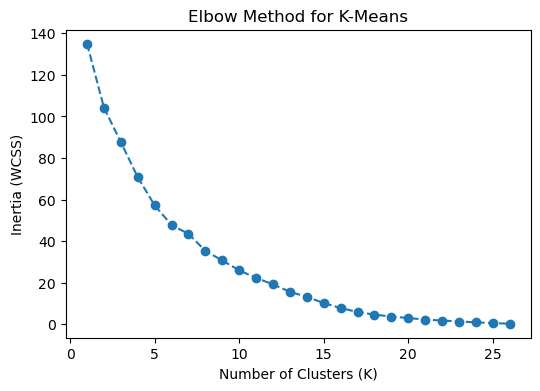

In [19]:
k_values = range(1, 27)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia_values, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for K-Means")
plt.show()

C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


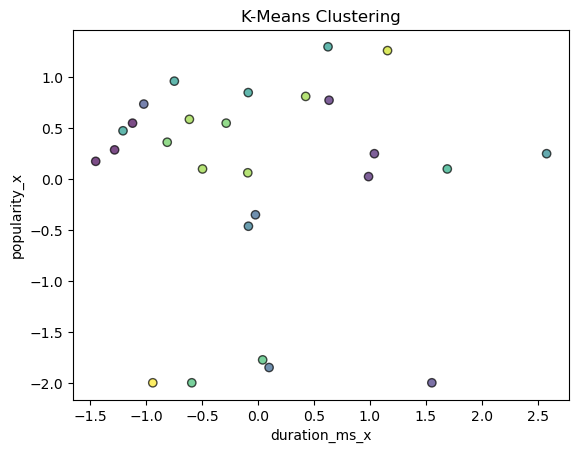

In [20]:
kmeans = KMeans(n_clusters=14, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

plot_clusters(X_scaled, kmeans_labels, "K-Means Clustering")

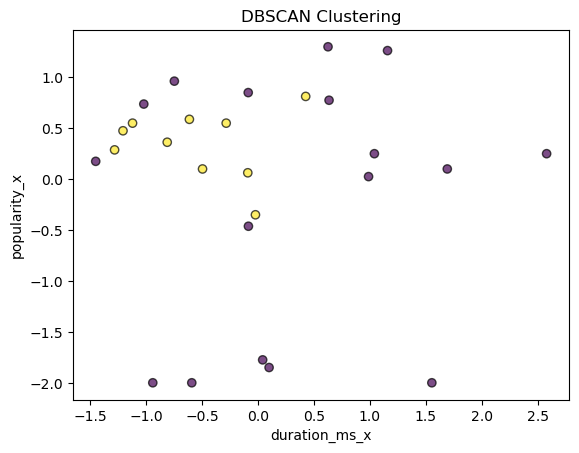

In [21]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

plot_clusters(X_scaled, dbscan_labels, "DBSCAN Clustering")

C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

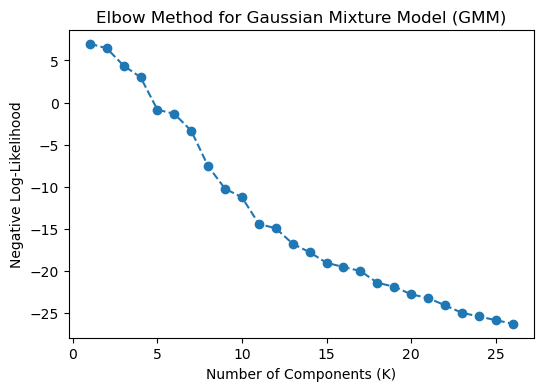

In [22]:
gmm_values = []
k_values = range(1, 27)
for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_scaled)
    gmm_values.append(-gmm.score(X_scaled))  

plt.figure(figsize=(6, 4))
plt.plot(k_values, gmm_values, marker='o', linestyle='--')
plt.xlabel("Number of Components (K)")
plt.ylabel("Negative Log-Likelihood")
plt.title("Elbow Method for Gaussian Mixture Model (GMM)")
plt.show()

C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


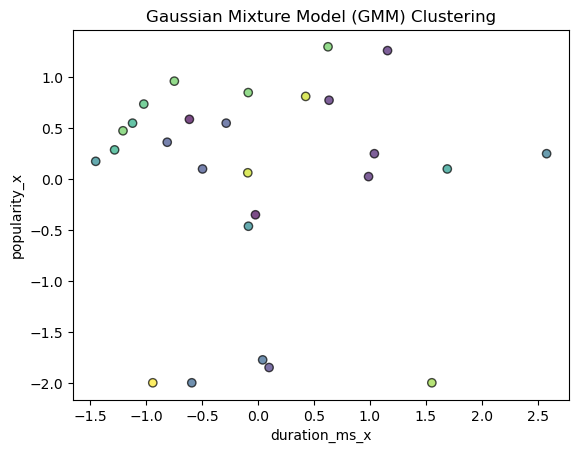

In [23]:
gmm = GaussianMixture(n_components=14, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

plot_clusters(X_scaled, gmm_labels, "Gaussian Mixture Model (GMM) Clustering")

In [20]:
file_paths = [
    'mpd.slice.0-999.json',
    'mpd.slice.99000-99999.json',
    'mpd.slice.995000-995999.json',
    'mpd.slice.996000-996999.json',
    'mpd.slice.997000-997999.json',
    'mpd.slice.998000-998999.json',
    'mpd.slice.999000-999999.json'
]

all_data = []

for file_path in file_paths:
    with open(file_path, 'r') as file:
        data = json.load(file)
        for playlist in data['playlists']:
            playlist_name = playlist['name']
            playlist_desc = playlist.get('description', '') 
            for track in playlist['tracks']:
                track_id = track['track_uri'].replace("spotify:track:", "")
                all_data.append({
                    'playlist_name': playlist_name,
                    'playlist_desc': playlist_desc,
                    'position_in_playlist': track['pos'],
                    'track_name': track['track_name'],
                    'id': track_id,  
                    'artist_name': track['artist_name'],
                    'duration_ms': track['duration_ms'],
                    'album_name': track['album_name']
                })

xdf = pd.DataFrame(all_data)

print(xdf.head())
xdf.dropna
dmz = pd.merge(xdf, songs, on = 'id', how = 'inner')
dmz.dropna()
dmz.info()
dmz.dropna(how = 'all')
dmz['synthness'] = (1 - dmz['acousticness']) * dmz['instrumentalness'] * dmz['energy']
features =['duration_ms_x', 'popularity', 'valence', 'tempo', 'synthness']
Xa= dmz[features].copy()
Xa_scaled=scaler.fit_transform(Xa)
def plot_clusters(Xa, labels, title):
    plt.scatter(Xa[:, 0,Xa], Xa[:, 1], c=labels, cmap='virdis', edgecolors='K', alpha=0.7)
    plt.title(title)
    plt.xLabel(features[0])
    plt.yLabel(features[1])
    plt.show()



  playlist_name playlist_desc  position_in_playlist  \
0    Throwbacks                                   0   
1    Throwbacks                                   1   
2    Throwbacks                                   2   
3    Throwbacks                                   3   
4    Throwbacks                                   4   

                                   track_name                      id  \
0  Lose Control (feat. Ciara & Fat Man Scoop)  0UaMYEvWZi0ZqiDOoHU3YI   
1                                       Toxic  6I9VzXrHxO9rA9A5euc8Ak   
2                               Crazy In Love  0WqIKmW4BTrj3eJFmnCKMv   
3                              Rock Your Body  1AWQoqb9bSvzTjaLralEkT   
4                                It Wasn't Me  1lzr43nnXAijIGYnCT8M8H   

         artist_name  duration_ms  \
0      Missy Elliott       226863   
1     Britney Spears       198800   
2            Beyoncé       235933   
3  Justin Timberlake       267266   
4             Shaggy       227600   

       

In [30]:
Xa_scaled=scaler.fit_transform(Xa)

k_values = range(2, 27)
inertia_values = []
silhouette_scores = []

for k in k_values:
    skmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    slabels = skmeans.fit_predict(Xa_scaled)
   
    inertia_values.append(skmeans.inertia_)
    if k + 1 > 1:
        silhouette = silhouette_score(Xa_scaled, slabels)
        silhouette_scores.append(silhouette)
        print(f"Clusters: {k}, Silhouette Score: {silhouette:.4f}")
    else:
        silhouette_scores.append(-1)  
        print(f"Clusters: {k}, Silhouette Score: Not applicable")
plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Cluster (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for K-Means')
plt.show()
soptimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
soptimal_silhouette = max(silhouette_scores)
print(f"\nOptimal Number of Clusters: {soptimal_k}")
print(f"Highest Silhouette Score: {soptimal_silhouette:.4f} (Best Model)")


Clusters: 2, Silhouette Score: 0.1864
Clusters: 3, Silhouette Score: 0.1996
Clusters: 4, Silhouette Score: 0.1913
Clusters: 5, Silhouette Score: 0.2051


KeyboardInterrupt: 

Due to memory limitations this code was executed seperately:

Clusters: 2, Silhouette Score: 0.1864
Clusters: 3, Silhouette Score: 0.1996
Clusters: 4, Silhouette Score: 0.1913
Clusters: 5, Silhouette Score: 0.2051
Clusters: 6, Silhouette Score: 0.2099
Clusters: 7, Silhouette Score: 0.1989
Clusters: 8, Silhouette Score: 0.1988
Clusters: 9, Silhouette Score: 0.1971
Clusters: 10, Silhouette Score: 0.1849
Clusters: 11, Silhouette Score: 0.1830
Clusters: 12, Silhouette Score: 0.1854
Clusters: 13, Silhouette Score: 0.1835
Clusters: 14, Silhouette Score: 0.1814
Clusters: 15, Silhouette Score: 0.1826
Clusters: 16, Silhouette Score: 0.1792
Clusters: 17, Silhouette Score: 0.1770
Clusters: 18, Silhouette Score: 0.1752
Clusters: 19, Silhouette Score: 0.1804
Clusters: 20, Silhouette Score: 0.1827
Clusters: 21, Silhouette Score: 0.1784
Clusters: 22, Silhouette Score: 0.1817
Clusters: 23, Silhouette Score: 0.1779
Clusters: 24, Silhouette Score: 0.1797
Clusters: 25, Silhouette Score: 0.1797
Clusters: 26, Silhouette Score: 0.1831


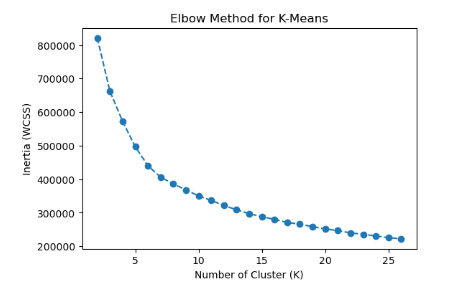

# THE CODE BELOW HAS BEEN EXECUTED ON A SEPERATE SERVER DUE TO LIMITATIONS OF HARDWARE

In [ ]:

eps_values = np.arange(0.5, 2.1, 0.1)
min_samples_values = range(2, 10)

best_score = -1
best_params = None

for eps, min_samples in itertools.product(eps_values, min_samples_values):
    ddbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dlabels = ddbscan.fit_predict(Xa_scaled)

    if len(set(labels)) > 1 and -1 in labels:  
        dscore = silhouette_score(Xa_scaled, dlabels)
        print(f"eps: {eps}. Min Samples: {min_samples}. Silhouette score: {dscore}")
        if dscore > best_score:
            best_score = dscore
            best_params = (eps, min_samples)

print(f"Best silhouette score: {best_score:.4f}")
print(f"Optimal eps: {best_params[0]}, Optimal min_samples: {best_params[1]}")


In [27]:
Xa_scaled=scaler.fit_transform(Xa)

eps_values = np.arange(2.1, 4, 0.1)
min_samples_values = range(2, 10)

best_score = -1
best_params = None

for eps, min_samples in itertools.product(eps_values, min_samples_values):
    ddbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dlabels = ddbscan.fit_predict(Xa_scaled)

    if len(set(labels)) > 1 and -1 in labels:  
        dscore = silhouette_score(Xa_scaled, dlabels)
        print(f"eps: {eps}. Min Samples: {min_samples}. Silhouette score: {dscore}")
        if dscore > best_score:
            best_score = dscore
            best_params = (eps, min_samples)

print(f"Best silhouette score: {best_score:.4f}")
print(f"Optimal eps: {best_params[0]}, Optimal min_samples: {best_params[1]}")


'\nXa_scaled=scaler.fit_transform(Xa)\n\neps_values = np.arange(2.1, 4, 0.1)\nmin_samples_values = range(2, 10)\n\nbest_score = -1\nbest_params = None\n\nfor eps, min_samples in itertools.product(eps_values, min_samples_values):\n    ddbscan = DBSCAN(eps=eps, min_samples=min_samples)\n    dlabels = ddbscan.fit_predict(Xa_scaled)\n\n    if len(set(labels)) > 1 and -1 in labels:  \n        dscore = silhouette_score(Xa_scaled, dlabels)\n        print(f"eps: {eps}. Min Samples: {min_samples}. Silhouette score: {dscore}")\n        if dscore > best_score:\n            best_score = dscore\n            best_params = (eps, min_samples)\n\nprint(f"Best silhouette score: {best_score:.4f}")\nprint(f"Optimal eps: {best_params[0]}, Optimal min_samples: {best_params[1]}")\n'

In [28]:
def calculate_silhouette(X, labels, model_name=""):
    if len(np.unique(labels)) >= 2 and -1 not in labels:
        score = sk_silhouette_score(X, labels)
        print(f"{model_name} Silhouette Score: {score:.4f}")
        return score
    elif len(np.unique(labels)) >= 2: 
        mask = labels != -1
        if np.sum(mask) > 1:  
            score = sk_silhouette_score(X[mask], labels[labels != -1])
            print(f"{model_name} Silhouette Score (excluding noise points): {score:.4f}")
            return score
        else:
            print(f"{model_name}: Cannot calculate silhouette score - most points are noise")
            return None
    else:
        print(f"{model_name}: Cannot calculate silhouette score - only one cluster found")
        return None

true_df['synthness'] = (1 - true_df['acousticness']) * true_df['instrumentalness'] * true_df['energy']

spindt_features = [
    "duration_ms_x", "popularity_x", "valence", "tempo", "synthness", 
    "danceability", "energy", "key", "loudness", "mode", "speechiness", 
    "acousticness", "instrumentalness", "liveness", "time_signature"
]
X = true_df[spindt_features].copy()
scaler = SkStandardScaler()
X_scaled = scaler.fit_transform(X)
dmz['popularity_x'] = dmz['popularity']  
dmz = dmz.drop('popularity', axis=1)
dmz_feature_mapping = {
    "popularity_x": "popularity_x",
    "duration_ms_x": "duration_ms_x",
    "valence": "valence",
    "tempo": "tempo",
    "synthness": "synthness",
    "danceability": "danceability",
    "energy": "energy", 
    "key": "key",
    "loudness": "loudness",
    "mode": "mode",
    "speechiness": "speechiness",
    "acousticness": "acousticness",
    "instrumentalness": "instrumentalness",
    "liveness": "liveness",
    "time_signature": "time_signature"
}
dmz_features = []
for feature in spindt_features:
    if feature in dmz_feature_mapping:
        mapped_feature = dmz_feature_mapping[feature]
        if mapped_feature in dmz.columns:
            dmz_features.append(mapped_feature)
        else:
            print(f"Warning: Mapped feature '{mapped_feature}' not found in dmz. Creating with zeros.")
            dmz[mapped_feature] = 0
            dmz_features.append(mapped_feature)
    else:
        print(f"Warning: No mapping defined for '{feature}'. Creating with zeros.")
        dmz[feature] = 0
        dmz_features.append(feature)

Xa = dmz[dmz_features].copy()
Xa_scaled = scaler.transform(Xa)
Xa_scaled = Xa_scaled[:150000]  
scaler_means = scaler.mean_
scaler_scales = scaler.scale_
print("Calculating feature statistics for Spindt data...")
spindt_raw_stats = {}
for feature_idx, feature_name in enumerate(spindt_features):
    spindt_raw_stats[feature_name] = {
        'mean': np.mean(true_df[feature_name]),
        'median': np.median(true_df[feature_name]),
        'std': np.std(true_df[feature_name]),
        'min': np.min(true_df[feature_name]),
        'max': np.max(true_df[feature_name])
    }
    print(f"Spindt {feature_name}: mean={spindt_raw_stats[feature_name]['mean']:.4f}, std={spindt_raw_stats[feature_name]['std']:.4f}")
def compare_cluster_to_spindt(cluster_data, spindt_stats, feature_names, scaler_means, scaler_scales):
    
    results = {}
    overall_similarity = 0
    
    unscaled_cluster_data = np.zeros_like(cluster_data)
    for feature_idx in range(cluster_data.shape[1]):
        unscaled_cluster_data[:, feature_idx] = cluster_data[:, feature_idx] * scaler_scales[feature_idx] + scaler_means[feature_idx]
    
    for feature_idx, feature_name in enumerate(feature_names):
        cluster_mean = np.mean(unscaled_cluster_data[:, feature_idx])
        spindt_mean = spindt_stats[feature_name]['mean']
        spindt_std = spindt_stats[feature_name]['std']
        
        z_score = (cluster_mean - spindt_mean) / (spindt_std + 1e-10) 
    
        similarity = np.exp(-(z_score**2) / 2)
        
        if z_score > 1.0:
            comparison = "significantly higher"
        elif z_score < -1.0:
            comparison = "significantly lower"
        else:
            comparison = "similar"
            
        results[feature_name] = {
            'cluster_mean': cluster_mean,
            'spindt_mean': spindt_mean,
            'z_score': z_score,
            'similarity': similarity,
            'comparison': comparison
        }
        
        overall_similarity += similarity
    
    # Average similarity across all features
    overall_similarity /= len(feature_names)
    
    return overall_similarity, results

PRIMARYDBSCAN = DBSCAN(eps=4.3, min_samples=3)
print("Fitting PRIMARYDBSCAN model...")
PLabels = PRIMARYDBSCAN.fit_predict(Xa_scaled)
print("\nCalculating silhouette Primary scores:")
PScore = calculate_silhouette(Xa_scaled, PLabels, "PRIMARYDBSCAN")
p_unique_clusters = len(np.unique([l for l in PLabels if l != -1]))
print(f"PRIMARYDBSCAN: Total points={len(PLabels)}, Non-noise points={np.sum(PLabels != -1)}, Unique clusters={p_unique_clusters}")
if p_unique_clusters > 0:
    print("\nComparing PRIMARYDBSCAN clusters with Spindt feature statistics:")
    print("=" * 80)
    
    for cluster_id in np.unique([l for l in PLabels if l != -1]):
        cluster_mask = PLabels == cluster_id
        cluster_size = np.sum(cluster_mask)
        cluster_data = Xa_scaled[cluster_mask]
        
        overall_sim, feature_comparisons = compare_cluster_to_spindt(
            cluster_data, spindt_raw_stats, spindt_features, scaler_means, scaler_scales
        )
        
        print(f"\nPRIMARYDBSCAN Cluster {cluster_id} (size: {cluster_size} points)")
        print(f"Overall similarity to Spindt: {overall_sim:.4f}")
        print("Feature-by-feature comparison:")
        
        sorted_features = sorted(feature_comparisons.items(), key=lambda x: x[1]['similarity'])
        
        for feature_name, stats in sorted_features:
            print(f"  {feature_name}: {stats['comparison']} (z-score: {stats['z_score']:.2f}, similarity: {stats['similarity']:.4f})")
            print(f"    Cluster mean: {stats['cluster_mean']:.4f}, Spindt mean: {stats['spindt_mean']:.4f}")
else:
    print("\nNo PRIMARY clusters to compare with Spindt feature statistics.")

del PLabels
del PRIMARYDBSCAN
gc.collect()


SecondaryDBSCAN = DBSCAN(eps=4.4, min_samples=6) 

print("Fitting SecondaryDBSCAN model...")
SLabels = SecondaryDBSCAN.fit_predict(Xa_scaled)


print("\nCalculating silhouette Secondary scores:")
SScore = calculate_silhouette(Xa_scaled, SLabels, "SecondaryDBSCAN")

print("\nClustering Statistics:")

s_unique_clusters = len(np.unique([l for l in SLabels if l != -1]))

print(f"SecondaryDBSCAN: Total points={len(SLabels)}, Non-noise points={np.sum(SLabels != -1)}, Unique clusters={s_unique_clusters}")

if s_unique_clusters > 0:
    print("\nComparing SecondaryDBSCAN clusters with Spindt feature statistics:")
    print("=" * 80)
    
    for cluster_id in np.unique([l for l in SLabels if l != -1]):
        cluster_mask = SLabels == cluster_id
        cluster_size = np.sum(cluster_mask)
        cluster_data = Xa_scaled[cluster_mask]
        
        overall_sim, feature_comparisons = compare_cluster_to_spindt(
    cluster_data, spindt_raw_stats, spindt_features, scaler_means, scaler_scales
)

        
        print(f"\nSecondaryDBSCAN Cluster {cluster_id} (size: {cluster_size} points)")
        print(f"Overall similarity to Spindt: {overall_sim:.4f}")
        print("Feature-by-feature comparison:")
        
        sorted_features = sorted(feature_comparisons.items(), key=lambda x: x[1]['similarity'])
        
        for feature_name, stats in sorted_features:
            print(f"  {feature_name}: {stats['comparison']} (z-score: {stats['z_score']:.2f}, similarity: {stats['similarity']:.4f})")
            print(f"    Cluster mean: {stats['cluster_mean']:.4f}, Spindt mean: {stats['spindt_mean']:.4f}")
else:
    print("\nNo SECONDARY clusters to compare with Spindt feature statistics.")


The code below has been executed with limited features. The code above has more features which were involved later. The reason for the addon was a lack of satisfaction with the results

In [51]:
spindt_features = {
    "synthness": 0.0120,
    "popularity_x": 65.5510,
    "valence": 0.5290,
    "tempo": 121.4241,
    "duration_ms_x": 235812.2835
}

filtered_df = dmz[~dmz['id'].isin(true_df['id'])]
filtered_df['popularity_x']=filtered_df['popularity']
filtered_df = filtered_df.drop_duplicates(subset=['id'])

feature_cols = ["duration_ms_x", "popularity_x", "valence", "tempo", "synthness", 
    "danceability", "energy", "key", "loudness", "mode", "speechiness", 
    "acousticness", "instrumentalness", "liveness", "time_signature"]
filtered_df["distance"] = np.sqrt(
    np.sum((filtered_df[feature_cols] - pd.Series(spindt_features))**2, axis=1)
)

# Find the song with the minimum distance
closest_song = filtered_df.nsmallest(1, "distance")

closest_song = filtered_df.nsmallest(10, "distance")
closest_song.head(10)

C:\Users\georg\AppData\Local\Temp\ipykernel_27632\3730988504.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['popularity_x']=filtered_df['popularity']


,playlist_name,playlist_desc,position_in_playlist,track_name,id,artist_name,duration_ms_x,album_name,name,popularity,duration_ms_y,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,synthness,popularity_x,distance
1586,PlayStation,,60,Shooting Stars,0UeYCHOETPfai02uskjJ3x,Bag Raiders,235813,Bag Raiders,Shooting Stars,71,235813,0,['Bag Raiders'],['6fXEqmGQEt6ONuqVmwrN46'],2011-01-01,0.636,0.720,11,-6.195,1,0.0432,0.08930,0.017800,0.0868,0.425,124.944,4,0.011672,71,6.527288
98782,april 17,,20,Bring On The Dancing Horses,5uh98HlgvoJd2zRWAduj2Y,Echo & the Bunnymen,235800,Songs To Learn And Sing,Bring on the Dancing Horses,57,235800,0,['Echo & the Bunnymen'],['0fgYKF9Avljex0L9Wt5b8Z'],1985-11-11,0.568,0.925,2,-5.274,1,0.0402,0.00635,0.004950,0.3150,0.752,118.450,4,0.004550,57,15.261030
25184,Country,,61,How 'Bout Them Cowgirls,7DJBy7gCXi2NkcgoIvPLcG,George Strait,235800,It Just Comes Natural,How 'Bout Them Cowgirls,52,235800,0,['George Strait'],['5vngPClqofybhPERIqQMYd'],2006-01-01,0.616,0.812,4,-4.618,1,0.0360,0.37700,0.000000,0.3040,0.399,117.033,4,0.000000,52,18.809912
20114,classic,,102,Things Can Only Get Better,1RbOObDFn7GOseR1w529Zj,Howard Jones,235826,Dream Into Action,Things Can Only Get Better,58,235827,0,['Howard Jones'],['6loBF9iQdE11WSX29fNKqY'],1985,0.752,0.743,7,-6.083,1,0.0331,0.03140,0.000117,0.1280,0.832,108.254,4,0.000084,58,20.462245
60187,Stand By Me,,4,Care Of Cell 44,5QXqz1KDz8Z8DmfQoxWmmy,The Zombies,235826,Odessey And Oracle,Care Of Cell 44,52,235827,0,['The Zombies'],['2jgPkn6LuUazBoBk6vvjh5'],1968-04-19,0.421,0.580,7,-7.011,1,0.0285,0.26500,0.013600,0.0973,0.403,129.959,4,0.005798,52,21.086308
633,Running 2.0,,81,Final Song,4qqArAiTPueDxIp7cf87h7,MØ,235826,Final Song,Final Song,69,235827,0,['MØ'],['0bdfiayQAKewqEvaU6rXCv'],2016-05-13,0.695,0.672,1,-6.109,0,0.0345,0.01400,0.000084,0.0756,0.245,104.988,4,0.000056,69,21.685575
81626,周杰倫,,9,最長的電影,6C9w3NKP7yKqGLBP09iEL4,Jay Chou,235840,我很忙,最長的電影,57,235840,0,['Jay Chou'],['2elBjNSdBE2Y3f0j1mjrql'],2008-03-10,0.533,0.359,9,-9.450,1,0.0314,0.19000,0.000000,0.1180,0.165,120.858,4,0.000000,57,29.013395
2144,80's,,42,Rapper's Delight - Single Version,0tm6gsXe0LSm9zeSspyMQu,The Sugarhill Gang,235840,The Sugarhill Gang - 30th Anniversary Edition,Rapper's Delight - Single Version,63,235840,0,['The Sugarhill Gang'],['7zliF6Q946WznVk3ZMYhZX'],2010-01-01,0.917,0.692,2,-11.665,1,0.2440,0.18500,0.000011,0.0686,0.819,111.782,4,0.000006,63,29.457873
150234,good jams,,49,I Write the Songs,12FZTFRyd4RBzvKf8RB0zO,Barry Manilow,235800,Tryin' To Get The Feeling,I Write the Songs,48,235800,0,['Barry Manilow'],['3alW3LYQS8K29z8C8NSLIX'],1975,0.267,0.417,5,-8.790,1,0.0283,0.82400,0.000961,0.0870,0.331,142.595,4,0.000071,48,30.119235
45,Awesome Playlist,,22,Hold the Line,4aVuWgvD0X63hcOCnZtNFA,Toto,235800,Toto,Hold the Line,78,235547,0,['TOTO'],['0PFtn5NtBbbUNbU9EAmIWF'],1978-10-10,0.473,0.898,6,-4.797,0,0.0561,0.00783,0.061800,0.1730,0.808,96.556,4,0.055062,78,30.403356


In [23]:
print(closest_song.to_dict(orient="records"))

[{'playlist_name': 'PlayStation', 'playlist_desc': '', 'position_in_playlist': 60, 'track_name': 'Shooting Stars', 'id': '0UeYCHOETPfai02uskjJ3x', 'artist_name': 'Bag Raiders', 'duration_ms_x': 235813, 'album_name': 'Bag Raiders', 'name': 'Shooting Stars', 'popularity': 71, 'duration_ms_y': 235813, 'explicit': 0, 'artists': "['Bag Raiders']", 'id_artists': "['6fXEqmGQEt6ONuqVmwrN46']", 'release_date': '2011-01-01', 'danceability': 0.636, 'energy': 0.72, 'key': 11, 'loudness': -6.195, 'mode': 1, 'speechiness': 0.0432, 'acousticness': 0.0893, 'instrumentalness': 0.0178, 'liveness': 0.0868, 'valence': 0.425, 'tempo': 124.944, 'time_signature': 4, 'synthness': 0.0116715312, 'popularity_x': 71, 'distance': 6.527287749739968}]


In [24]:
spindt_features = {
    "synthness": 0.0120,
    "popularity_x": 65.5510,
    "valence": 0.5290,
    "tempo": 121.4241,
    "duration_ms_x": 235812.2835
}

scaler = StandardScaler()
filtered_df[feature_cols] = scaler.fit_transform(filtered_df[feature_cols])
spindt_scaled = scaler.transform([list(spindt_features.values())])[0]
filtered_df['popularity_x']=filtered_df['popularity']
feature_cols = ["duration_ms_x", "popularity_x", "valence", "tempo", "synthness", 
    "danceability", "energy", "key", "loudness", "mode", "speechiness", 
    "acousticness", "instrumentalness", "liveness", "time_signature"]

filtered_df["distance"] = np.sqrt(
    np.sum((filtered_df[feature_cols] - spindt_scaled) ** 2, axis=1)
)

closest_song = filtered_df.nsmallest(1, "distance")

print(closest_song)
closest_song.head()

C:\Users\georg\AppData\Local\Temp\ipykernel_27632\4233432391.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[feature_cols] = scaler.fit_transform(filtered_df[feature_cols])
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\georg\AppData\Local\Temp\ipykernel_27632\4233432391.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['popularity_x']=

        playlist_name playlist_desc  position_in_playlist  \
121209  Wedding songs                                  58   

                                track_name                      id  \
121209  I Can't Give You Anything But Love  7JeVq9ckcAkIsmWbagXQUX   

            artist_name  duration_ms_x                 album_name  \
121209  Louis Armstrong      -0.558897  Columbia Original Masters   

                                      name  popularity  duration_ms_y  \
121209  I Can't Give You Anything But Love           1         202600   

        explicit              artists                  id_artists  \
121209         0  ['Louis Armstrong']  ['19eLuQmk9aCobbVDHc6eek']   

       release_date  danceability  energy  key  loudness  mode  speechiness  \
121209         1925         0.622   0.127    8   -11.603     1       0.0783   

        acousticness  instrumentalness  liveness   valence     tempo  \
121209         0.928             0.664     0.105  0.502291 -0.271048   

       

,playlist_name,playlist_desc,position_in_playlist,track_name,id,artist_name,duration_ms_x,album_name,name,popularity,duration_ms_y,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,synthness,popularity_x,distance
121209,Wedding songs,,58,I Can't Give You Anything But Love,7JeVq9ckcAkIsmWbagXQUX,Louis Armstrong,-0.558897,Columbia Original Masters,I Can't Give You Anything But Love,1,202600,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],1925,0.622,0.127,8,-11.603,1,0.0783,0.928,0.664,0.105,0.502291,-0.271048,4,-0.090215,1,1.280674


In [25]:
print(closest_song['track_name'])

121209    I Can't Give You Anything But Love
Name: track_name, dtype: object


In [26]:
print(closest_song.to_dict(orient="records"))

[{'playlist_name': 'Wedding songs', 'playlist_desc': '', 'position_in_playlist': 58, 'track_name': "I Can't Give You Anything But Love", 'id': '7JeVq9ckcAkIsmWbagXQUX', 'artist_name': 'Louis Armstrong', 'duration_ms_x': -0.5588967337760398, 'album_name': 'Columbia Original Masters', 'name': "I Can't Give You Anything But Love", 'popularity': 1, 'duration_ms_y': 202600, 'explicit': 0, 'artists': "['Louis Armstrong']", 'id_artists': "['19eLuQmk9aCobbVDHc6eek']", 'release_date': '1925', 'danceability': 0.622, 'energy': 0.127, 'key': 8, 'loudness': -11.603, 'mode': 1, 'speechiness': 0.0783, 'acousticness': 0.928, 'instrumentalness': 0.664, 'liveness': 0.105, 'valence': 0.5022906585188872, 'tempo': -0.27104808003082087, 'time_signature': 4, 'synthness': -0.09021463223749425, 'popularity_x': 1, 'distance': 1.2806738393946129}]


In [27]:
true_df.head(20)

,preview_url,available_markets,explicit_x,type,episode,track,album,artists_x,disc_number,track_number,duration_ms_x,external_ids,external_urls,href,id,name_x,popularity_x,uri,is_local,name_y,popularity_y,duration_ms_y,explicit_y,artists_y,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,explicitnum,synthness
2,None,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,2,181259,{'isrc': 'TCACH1515840'},{'spotify': 'https://open.spotify.com/track/1D...,https://api.spotify.com/v1/tracks/1DrlLvlYd1FI...,1DrlLvlYd1FIjNavRm6NdX,Back Pocket,61,spotify:track:1DrlLvlYd1FIjNavRm6NdX,False,Back Pocket,64.0,181260.0,0.0,['Vulfpeck'],['7pXu47GoqSYRajmBCjxdD6'],2015-10-09,0.839,0.585,2.0,-7.738,1.0,0.1530,0.478000,0.002810,0.0435,0.890,89.821,4.0,0.0,8.580897e-04
10,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,2,243160,{'isrc': 'GBBPW0900065'},{'spotify': 'https://open.spotify.com/track/0i...,https://api.spotify.com/v1/tracks/0iTpQYzJnYgh...,0iTpQYzJnYgh7kIxyq8A2O,Two Weeks,4,spotify:track:0iTpQYzJnYgh7kIxyq8A2O,False,Two Weeks,70.0,243160.0,0.0,['Grizzly Bear'],['2Jv5eshHtLycR6R8KQCdc4'],2009-05-24,0.537,0.712,5.0,-5.597,1.0,0.0286,0.289000,0.005680,0.0800,0.704,159.871,4.0,0.0,2.875398e-03
18,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,1,240586,{'isrc': 'USDMG1677702'},{'spotify': 'https://open.spotify.com/track/47...,https://api.spotify.com/v1/tracks/47KDDZgFiX1w...,47KDDZgFiX1w6RFOuLXsSn,Tomorrow,6,spotify:track:47KDDZgFiX1w6RFOuLXsSn,False,Tomorrow,69.0,240587.0,0.0,['Shakey Graves'],['1fZpYWNWdL5Z3wrDtISFUH'],2016-09-02,0.564,0.354,7.0,-10.850,1.0,0.0334,0.730000,0.000003,0.2080,0.423,98.075,3.0,0.0,3.278394e-07
25,None,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,5,234800,{'isrc': 'USEP40937005'},{'spotify': 'https://open.spotify.com/track/0U...,https://api.spotify.com/v1/tracks/0UV5zxRMz6AO...,0UV5zxRMz6AO4ZwUOZNIKI,Where'd All the Time Go?,76,spotify:track:0UV5zxRMz6AO4ZwUOZNIKI,False,Where'd All the Time Go?,71.0,234800.0,0.0,['Dr. Dog'],['4mLJ3XfOM5FPjSAWdQ2Jk7'],2010-11-02,0.454,0.820,2.0,-4.193,1.0,0.0567,0.132000,0.000969,0.1150,0.575,166.303,4.0,0.0,6.896954e-04
29,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,2,196560,{'isrc': 'US3R41428202'},{'spotify': 'https://open.spotify.com/track/5H...,https://api.spotify.com/v1/tracks/5HLes17mwCwK...,5HLes17mwCwKt81mi0Tk35,"Archie, Marry Me",0,spotify:track:5HLes17mwCwKt81mi0Tk35,False,"Archie, Marry Me",63.0,196560.0,0.0,['Alvvays'],['3kzwYV3OCB010YfXMF0Avt'],2014-07-22,0.270,0.830,7.0,-4.592,1.0,0.0741,0.009560,0.434000,0.1420,0.205,117.314,4.0,0.0,3.567763e-01
33,None,"[CA, MX, US]",False,track,False,True,"{'available_markets': ['CA', 'MX', 'US'], 'typ...",[{'external_urls': {'spotify': 'https://open.s...,1,7,237693,{'isrc': 'USC4R1601926'},{'spotify': 'https://open.spotify.com/track/53...,https://api.spotify.com/v1/tracks/53I7CviVHhNY...,53I7CviVHhNYEKth717RLG,Coins,44,spotify:track:53I7CviVHhNYEKth717RLG,False,Coins,60.0,237693.0,0.0,['Local Natives'],['75dQReiBOHN37fQgWQrIAJ'],2016-09-09,0.566,0.576,5.0,-4.859,1.0,0.0365,0.057800,0.000000,0.0523,0.607,138.045,4.0,0.0,0.000000e+00
59,None,[],False,track,False,True,"{'available_markets': [], 'type': 'album', 'al...",[{'external_urls': {'spotify': 'https://open.s...,1,5,212183,{'isrc': 'USJ5G1612305'},{'spotify': 'https://open.spotify.com/track/17...,https://api.spotify.com/v1/tracks/172rW45GEnGo...,172rW45GEnGoJUuWfm1drt

In [28]:
for i in range(50):
    print(true_df['name_x'].iloc[i])


Back Pocket
Two Weeks
Tomorrow
Where'd All the Time Go?
Archie, Marry Me
Coins
Your Best American Girl
What's in My Head?
When My Time Comes
In the Aeroplane Over the Sea
Elephant
Rawnald Gregory Erickson the Second
Lazy Eye
Tu Volverás
Them Changes
Deceptacon
Trouble
Paper Planes
Self Esteem
Exit Music (For A Film)
Apocalypse
Flags
Yellow
A Message
Daft Punk Is Playing at My House
Feels Like We Only Go Backwards
Excursions


IndexError: single positional indexer is out-of-bounds

In [29]:
dmz.head(15)

,playlist_name,playlist_desc,position_in_playlist,track_name,id,artist_name,duration_ms_x,album_name,name,popularity,duration_ms_y,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,synthness
0,Throwbacks,,0,Lose Control (feat. Ciara & Fat Man Scoop),0UaMYEvWZi0ZqiDOoHU3YI,Missy Elliott,226863,The Cookbook,Lose Control (feat. Ciara & Fat Man Scoop),68,226864,1,"['Missy Elliott', 'Ciara', 'Fatman Scoop']","['2wIVse2owClT7go1WT98tk', '2NdeV5rLm47xAvogXr...",2005-07-04,0.904,0.813,4,-7.105,0,0.1210,0.03110,0.006970,0.0471,0.810,125.461,4,0.005490
1,Throwbacks,,1,Toxic,6I9VzXrHxO9rA9A5euc8Ak,Britney Spears,198800,In The Zone,Toxic,83,198800,0,['Britney Spears'],['26dSoYclwsYLMAKD3tpOr4'],2003-11-13,0.774,0.838,5,-3.914,0,0.1140,0.02490,0.025000,0.2420,0.924,143.040,4,0.020428
2,Throwbacks,,2,Crazy In Love,0WqIKmW4BTrj3eJFmnCKMv,Beyoncé,235933,Dangerously In Love (Alben für die Ewigkeit),Crazy In Love (feat. Jay-Z),25,235933,0,"['Beyoncé', 'JAY-Z']","['6vWDO969PvNqNYHIOW5v0m', '3nFkdlSjzX9mRTtwJO...",2003-06-23,0.664,0.758,2,-6.583,0,0.2100,0.00238,0.000000,0.0598,0.701,99.259,4,0.000000
3,Throwbacks,,3,Rock Your Body,1AWQoqb9bSvzTjaLralEkT,Justin Timberlake,267266,Justified,Rock Your Body,78,267267,0,['Justin Timberlake'],['31TPClRtHm23RisEBtV3X7'],2002-11-04,0.892,0.714,4,-6.055,0,0.1410,0.20100,0.000234,0.0521,0.817,100.972,4,0.000133
4,Throwbacks,,6,My Boo,68vgtRHr7iZHpzGpon6Jlo,Usher,223440,Confessions,My Boo,80,223440,0,"['Usher', 'Alicia Keys']","['23zg3TcAtWQy7J6upgbUnj', '3DiDSECUqqY1AuBP8q...",2004-03-23,0.662,0.507,5,-8.238,1,0.1180,0.25700,0.000000,0.0465,0.676,86.412,4,0.000000
5,Throwbacks,,7,Buttons,3BxWKCI06eQ5Od8TY2JBeA,The Pussycat Dolls,225560,PCD,Buttons,66,225560,0,['The Pussycat Dolls'],['6wPhSqRtPu1UhRCDX5yaDJ'],2005-01-01,0.570,0.821,2,-4.380,1,0.2670,0.17800,0.000000,0.2890,0.408,210.857,4,0.000000
6,Throwbacks,,8,Say My Name,7H6ev70Weq6DdpZyyTmUXk,Destiny's Child,271333,The Writing's On The Wall,Say My Name,77,271333,0,"[""Destiny's Child""]",['1Y8cdNmUJH7yBTd9yOvr5i'],1999-07-27,0.713,0.678,5,-3.525,0,0.1020,0.27300,0.000000,0.1490,0.734,138.009,4,0.000000
7,Throwbacks,,9,Hey Ya! - Radio Mix / Club Mix,2PpruBYCo4H7WOBJ7Q2EwM,OutKast,235213,Speakerboxxx/The Love Below,Hey Ya!,80,235213,0,['Outkast'],['1G9G7WwrXka3Z1r7aIDjI7'],2003,0.727,0.974,4,-2.261,0,0.0664,0.10300,0.000532,0.1740,0.965,79.526,4,0.000465
8,Throwbacks,,10,Promiscuous,2gam98EZKrF9XuOkU13ApN,Nelly Furtado,242293,Loose,Promiscuous,82,242293,0,"['Nelly Furtado', 'Timbaland']","['2jw70GZXlAI8QzWeY2bgRc', '5Y5TRrQiqgUO4S36tz...",2006-01-01,0.808,0.970,10,-6.098,0,0.0506,0.05690,0.000061,0.1540,0.868,114.328,4,0.000056
9,Throwbacks,,12,Beautiful Soul,1HwpWwa6bnqqRhK8agG4RS,Jesse McCartney,214226,Beautiful Soul,Beautiful Soul,74,214227,0,['Jesse McCartney'],['2Hjj68yyUPiC0HKEOigcEp'],2004-01-01,0.660,0.666,9,-4.342,1,0.0472,0.07590,0.000000,0.0268,0.933,89.975,4,0.000000


NEW FEATURES

Overall similarity to Spindt: 0.9567
Feature-by-feature comparison:
  loudness: similar (z-score: -0.57, similarity: 0.8478)
    Cluster mean: -8.4864, Spindt mean: -7.1135
  mode: similar (z-score: -0.46, similarity: 0.8977)
    Cluster mean: 0.6868, Spindt mean: 0.8519
  speechiness: similar (z-score: 0.44, similarity: 0.9062)
    Cluster mean: 0.0771, Spindt mean: 0.0562
  synthness: similar (z-score: -0.40, similarity: 0.9239)
    Cluster mean: 0.0239, Spindt mean: 0.0943
  instrumentalness: similar (z-score: -0.34, similarity: 0.9450)
    Cluster mean: 0.0655, Spindt mean: 0.1615
  valence: similar (z-score: 0.34, similarity: 0.9450)
    Cluster mean: 0.5462, Spindt mean: 0.4690
  acousticness: similar (z-score: 0.33, similarity: 0.9485)
    Cluster mean: 0.2870, Spindt mean: 0.2115
  danceability: similar (z-score: 0.30, similarity: 0.9569)
    Cluster mean: 0.5856, Spindt mean: 0.5299
  liveness: similar (z-score: 0.12, similarity: 0.9923)
    Cluster mean: 0.1917, Spindt mean: 0.1765
  tempo: similar (z-score: 0.10, similarity: 0.9950)
    Cluster mean: 120.6874, Spindt mean: 117.6650
  energy: similar (z-score: -0.09, similarity: 0.9958)
    Cluster mean: 0.6210, Spindt mean: 0.6381
  duration_ms_x: similar (z-score: 0.06, similarity: 0.9983)
    Cluster mean: 241341.2908, Spindt mean: 238695.0000
  time_signature: similar (z-score: 0.05, similarity: 0.9986)
    Cluster mean: 3.9398, Spindt mean: 3.9259
  key: similar (z-score: 0.03, similarity: 0.9995)
    Cluster mean: 5.2846, Spindt mean: 5.1852
  popularity_x: similar (z-score: -0.02, similarity: 0.9999)
    Cluster mean: 52.9541, Spindt mean: 53.3704


In [35]:
spindt_features = {
    "speechiness": 0.0771,
    "mode": 0.6868,
    "danceability": 0.5856,
    "instrumentalness": 0.0655,
    "synthness": 0.0239,
    "popularity_x": 52.9541,
    "valence": 0.5462,
    "time_signature": 3.9398,
    "tempo": 120.6874,
    "energy": 0.6210,
    "duration_ms_x": 241341.2908,
    "liveness": 0.1917,
    "loudness": -8.4864,
    "key": 5.2846,
    "acousticness": 0.2870
}

filtered_df = dmz[~dmz['id'].isin(true_df['id'])]
filtered_df = filtered_df[filtered_df['explicit'] == 0]
filtered_df = filtered_df.drop_duplicates(subset=['id'])
filtered_df['popularity_x'] = filtered_df['popularity']
feature_cols = ["speechiness", "mode", "danceability", "instrumentalness", "synthness", 
                "popularity_x", "valence", "time_signature", "tempo", "energy", 
                "duration_ms_x", "liveness", "loudness", "key", "acousticness"]

filtered_df["distance"] = np.sqrt(
    np.sum((filtered_df[feature_cols] - pd.Series(spindt_features))**2, axis=1)
)

closest_song = filtered_df.nsmallest(10, "distance")
closest_song.head(10)

,playlist_name,playlist_desc,position_in_playlist,track_name,id,artist_name,duration_ms_x,album_name,name,popularity,duration_ms_y,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,synthness,popularity_x,distance
432,SARAH,,27,Tenerife Sea,6vSwxzO2Qf4BinHSXRwZJe,Ed Sheeran,241346,x,Tenerife Sea,56,241347,0,['Ed Sheeran'],['6eUKZXaKkcviH0Ku9w2n3V'],2013,0.530,0.346,8,-10.497,1,0.0376,0.6970,0.000011,0.1050,0.359,121.876,4,1.121767e-06,56,6.684330
35908,Party 2016,,104,The Man Who Sold The World - 2015 Remastered V...,4mWahKerLaVddUjb8d1Q4Q,David Bowie,241346,The Man Who Sold The World,The Man Who Sold the World - 2015 Remaster,64,241347,0,['David Bowie'],['0oSGxfWSnnOXhD2fKuz2Gy'],1970-11-04,0.474,0.387,2,-14.416,0,0.0305,0.6420,0.005570,0.1430,0.545,118.486,4,7.717012e-04,64,13.987874
145224,Stevie Wonder :),,37,Copacabana (At the Copa),3hWOGUIOcqKDoVpFBLp9Qc,Barry Manilow,241346,The Greatest Songs Of The Seventies,Copacabana (At the Copa),57,241347,0,['Barry Manilow'],['3alW3LYQS8K29z8C8NSLIX'],2007-09-10,0.763,0.665,9,-7.914,0,0.0444,0.5420,0.000033,0.0972,0.803,108.035,4,9.989896e-06,57,14.608747
43566,play,,70,I Will Be Found (Lost At Sea),05Ez6KwjICkscWQVTsT3f5,John Mayer,241346,Paradise Valley,I Will Be Found (Lost At Sea),57,241347,0,['John Mayer'],['0hEurMDQu99nJRq8pTxO14'],2013-08-20,0.563,0.401,5,-9.073,1,0.0243,0.4150,0.003050,0.1580,0.277,139.863,4,7.154843e-04,57,20.172319
2165,80's,,71,Time After Time,7o9uu2GDtVDr9nsR7ZRN73,Cyndi Lauper,241333,She's So Unusual,Time After Time,74,241333,0,['Cyndi Lauper'],['2BTZIqw0ntH9MvilQ3ewNY'],1983-10-14,0.726,0.449,0,-9.206,1,0.0286,0.4870,0.000001,0.0824,0.294,130.388,4,3.086516e-07,74,25.189036
73040,relaxing,,32,If You Ever Come Back,6Vg3QC5UcpdAcGXgUqkjIX,The Script,241348,Science & Faith,If You Ever Come Back,55,241653,0,['The Script'],['3AQRLZ9PuTAozP28Skbq8V'],2010-09-13,0.549,0.809,7,-4.714,1,0.0277,0.0389,0.000000,0.1160,0.572,95.989,4,0.000000e+00,55,26.011484
17173,Oldies,,110,I Can't Dance - 2007 Digital Remaster,7safX55XidhznxK5eDdDm5,Genesis,241360,We Can't Dance,I Can't Dance - Remastered 2007,66,241360,0,['Genesis'],['3CkvROUTQ6nRi9yQOcsB50'],1991-11-11,0.916,0.523,3,-9.733,1,0.0521,0.4320,0.000011,0.0488,0.880,107.564,4,3.356823e-06,66,26.450058
18319,Mia,,74,Brighter Than Sunshine,3W6UA36h0zahjxU709wLSI,Aqualung,241360,Strange & Beautiful,Brighter Than Sunshine,50,241360,0,['Aqualung'],['3uT7nEkZwWc2GBiqUZGoOe'],2005-01-17,0.314,0.483,11,-8.365,1,0.0351,0.2290,0.026900,0.5640,0.348,145.047,4,1.001737e-02,50,31.388067
4534,Love Music,,72,Love You More,2KIxyCvBR4u1f9B2IRdlXX,Ginuwine,241373,The Senior,Love You More,45,241373,0,['Ginuwine'],['7r8RF1tN2A4CiGEplkp1oP'],2003-04-08,0.661,0.422,8,-6.918,0,0.0282,0.0887,0.000002,0.1640,0.428,117.007,4,9.191190e-07,45,33.056037
17588,teenage angst,closeted hypochondriac,110,Blessed,0KyzXQhY2yzcb1FYCHkZc2,Daniel Caesar,241370,Freudian,Blessed,67,241371,0,['Daniel Caesar'],['20wkVLutqVOYrc0kxFs7rA'],2017-08-25,0.448,0.263,11,-11.980,1,0.0373,0.8240,0.000002,0.1060,0.451,109.889,1,8.841008e-08,67,34.527971


# Tenerifie SEA is our main pick. Below is the backup secondary training and its results

Overall similarity to Spindt: 0.9568
Feature-by-feature comparison:
  loudness: similar (z-score: -0.57, similarity: 0.8484)
    Cluster mean: -8.4834, Spindt mean: -7.1135
  mode: similar (z-score: -0.46, similarity: 0.8977)
    Cluster mean: 0.6869, Spindt mean: 0.8519
  speechiness: similar (z-score: 0.44, similarity: 0.9070)
    Cluster mean: 0.0770, Spindt mean: 0.0562
  synthness: similar (z-score: -0.40, similarity: 0.9238)
    Cluster mean: 0.0238, Spindt mean: 0.0943
  valence: similar (z-score: 0.34, similarity: 0.9447)
    Cluster mean: 0.5464, Spindt mean: 0.4690
  instrumentalness: similar (z-score: -0.34, similarity: 0.9448)
    Cluster mean: 0.0654, Spindt mean: 0.1615
  acousticness: similar (z-score: 0.32, similarity: 0.9487)
    Cluster mean: 0.2868, Spindt mean: 0.2115
  danceability: similar (z-score: 0.30, similarity: 0.9567)
    Cluster mean: 0.5858, Spindt mean: 0.5299
  liveness: similar (z-score: 0.12, similarity: 0.9923)
    Cluster mean: 0.1916, Spindt mean: 0.1765
  tempo: similar (z-score: 0.10, similarity: 0.9950)
    Cluster mean: 120.6999, Spindt mean: 117.6650
  energy: similar (z-score: -0.09, similarity: 0.9959)
    Cluster mean: 0.6211, Spindt mean: 0.6381
  time_signature: similar (z-score: 0.05, similarity: 0.9986)
    Cluster mean: 3.9399, Spindt mean: 3.9259
  duration_ms_x: similar (z-score: 0.05, similarity: 0.9987)
    Cluster mean: 240982.0497, Spindt mean: 238695.0000
  key: similar (z-score: 0.03, similarity: 0.9995)
    Cluster mean: 5.2841, Spindt mean: 5.1852
  popularity_x: similar (z-score: -0.02, similarity: 0.9999)
    Cluster mean: 52.9607, Spindt mean: 53.3704


In [36]:
spindt_features = {
    "speechiness": 0.0770,
    "mode": 0.6869,
    "danceability": 0.5858,
    "instrumentalness": 0.0654,
    "synthness": 0.0238,
    "popularity_x": 52.9607,
    "valence": 0.5464,
    "time_signature": 3.9399,
    "tempo": 120.6999,
    "energy": 0.6211,
    "duration_ms_x": 240982.0497,
    "liveness": 0.1916,
    "loudness": -8.4834,
    "key": 5.2841,
    "acousticness": 0.2868
}

filtered_df = dmz[~dmz['id'].isin(true_df['id'])]
filtered_df = filtered_df[filtered_df['explicit'] == 0]
filtered_df = filtered_df.drop_duplicates(subset=['id'])
filtered_df['popularity_x'] = filtered_df['popularity']
feature_cols = ["speechiness", "mode", "danceability", "instrumentalness", "synthness", 
                "popularity_x", "valence", "time_signature", "tempo", "energy", 
                "duration_ms_x", "liveness", "loudness", "key", "acousticness"]

filtered_df["distance"] = np.sqrt(
    np.sum((filtered_df[feature_cols] - pd.Series(spindt_features))**2, axis=1)
)

closest_song = filtered_df.nsmallest(10, "distance")
closest_song.head(10)

,playlist_name,playlist_desc,position_in_playlist,track_name,id,artist_name,duration_ms_x,album_name,name,popularity,duration_ms_y,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,synthness,popularity_x,distance
116104,Vibes,,72,Thrown Down,4ffoKyYY6ElVpxUpE48jOc,Fleetwood Mac,240986,Say You Will,Thrown Down,47,240987,0,['Fleetwood Mac'],['08GQAI4eElDnROBrJRGE0X'],2003-04-15,0.626,0.791,5,-5.735,0,0.0262,0.52700,0.000040,0.0952,0.864,129.976,4,0.000015,47,12.062192
149385,raggaeton,,59,Rica Y Apretadita - Featuring Melissa Jimenez,3ivsIHt8BiLLicBoIZp8wT,A.B. Quintanilla III,241000,Planeta Kumbia,Rica Y Apretadita,53,241000,0,"['A.B. Quintanilla III', 'Kumbia All Starz', '...","['5MP9bH9aUryiKQeUvABLIU', '6m3l8oNDOGE3vo66Ag...",2008-01-01,0.744,0.932,6,-2.918,1,0.1020,0.09440,0.000000,0.4100,0.932,115.354,4,0.000000,53,19.563789
38771,industrial,,37,I Beg Your Pardon (I Never Promised You A Rose...,3QtMzmaXaQnHp70RsAZ8rL,Kon Kan,241000,Move To Move,I Beg Your Pardon (I Never Promised You a Rose...,47,241000,0,['Kon Kan'],['1c4WjNh9IM9AlX5FO9dIUc'],1989-05-30,0.578,0.919,11,-7.551,1,0.0480,0.01580,0.001640,0.1180,0.763,123.135,4,0.001483,47,19.938291
20478,Rock en español,,55,El Son del Dolor,6Sg8HCDhEX0IL7My2HjS6H,Cuca,240973,La Invasion De Los Blatidos,El Son del Dolor,63,240973,0,['Cuca'],['14xs9RNQa8MHRS7YU8Bzfk'],1992-10-23,0.430,0.842,1,-5.641,1,0.0470,0.00922,0.000003,0.3830,0.378,145.988,4,0.000002,63,29.136367
192078,Cruzin,,120,Follow You Follow Me - 2007 - Remaster,0HdcunWW5FsRqKr3lwJOIo,Genesis,240991,And Then There Were Three,Follow You Follow Me - Remastered 2007,65,240991,0,['Genesis'],['3CkvROUTQ6nRi9yQOcsB50'],1978-04-07,0.531,0.747,7,-9.368,1,0.0344,0.14600,0.072200,0.0700,0.761,93.559,4,0.046059,65,31.074289
69220,Throwbacks,,24,Private Emotion,1rjHJSGgt10GAtgLrDtHTM,Ricky Martin,241000,Ricky Martin,Private Emotion (feat. Meja),54,241000,0,"['Ricky Martin', 'Meja']","['7slfeZO9LsJbWgpkIoXBUJ', '4eYjWapog2qNOYRnqB...",1999,0.510,0.726,1,-7.000,1,0.0337,0.26500,0.000000,0.0911,0.489,146.553,4,0.000000,54,31.817749
59543,💞💞,,25,Don't Forget Where You Belong,3yhVmOZSpZqnhRrEiYI0EJ,One Direction,241000,Midnight Memories (Deluxe),Don't Forget Where You Belong,67,241000,0,['One Direction'],['4AK6F7OLvEQ5QYCBNiQWHq'],2013-11-25,0.540,0.711,7,-5.717,1,0.0255,0.10300,0.000000,0.0827,0.292,92.014,4,0.000000,67,36.783461
93255,summer,,81,May I? - 2003 Remastered Version,64DkUADFBHKvEjEbh0cXcl,Kevin Ayers,241012,Shooting At The Moon,May I? - 2003 Remaster,37,241012,0,['Kevin Ayers'],['5k5yIvxtsqHqWrRBF3nhSY'],1970,0.540,0.349,0,-17.387,1,0.0347,0.77700,0.885000,0.1180,0.401,107.920,4,0.068877,37,37.728057
53278,nostalgia.,,52,Kind & Generous,6VrjF67WFChXh8uYYBfeRr,Natalie Merchant,241013,Ophelia,Kind & Generous,63,241013,0,['Natalie Merchant'],['73JEBdDEFeVaOLg3y0HhBD'],1998,0.593,0.611,3,-6.773,1,0.0504,0.35000,0.533000,0.6050,0.473,93.171,4,0.211681,63,42.722690
181163,music,,8,Ya'alili,0gFKx8jbJmJoigb7PP0vJ6,8th Day,240946,Chasing Prophecy,Ya'alili,34,240947,0,['8th Day'],['15i1niWKFEj0zqnhtYAv7D'],2011-02-03,0.665,0.856,2,-4.608,0,0.0323,0.06310,0.000000,0.1540,0.812,104.012,4,0.000000,34,44.317545


To little surprise the results are quite different, but given the greater distance score, I maintain the choice of Tenerifie Sea is best.

In [46]:
spindt_features = {
    "speechiness": 0.0771,
    "mode": 0.6868,
    "danceability": 0.5856,
    "instrumentalness": 0.0655,
    "synthness": 0.0239,
    "popularity_x": 52.9541,
    "valence": 0.5462,
    "time_signature": 3.9398,
    "tempo": 120.6874,
    "energy": 0.6210,
    "duration_ms_x": 241341.2908,
    "liveness": 0.1917,
    "loudness": -8.4864,
    "key": 5.2846,
    "acousticness": 0.2870
}

filtered_df = dmz[~dmz['id'].isin(true_df['id'])]
#filtered_df = filtered_df[filtered_df['explicit'] == 0]
filtered_df = filtered_df[filtered_df['artist_name'].str.contains('Carti', case=False)]

filtered_df = filtered_df.drop_duplicates(subset=['id'])
filtered_df['popularity_x'] = filtered_df['popularity']
feature_cols = ["speechiness", "mode", "danceability", "instrumentalness", "synthness", 
                "popularity_x", "valence", "time_signature", "tempo", "energy", 
                "duration_ms_x", "liveness", "loudness", "key", "acousticness"]

filtered_df["distance"] = np.sqrt(
    np.sum((filtered_df[feature_cols] - pd.Series(spindt_features))**2, axis=1)
)

closest_song = filtered_df.nsmallest(10, "distance")
closest_song.head(10)

,playlist_name,playlist_desc,position_in_playlist,track_name,id,artist_name,duration_ms_x,album_name,name,popularity,duration_ms_y,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,synthness,popularity_x,distance
159651,BUMP,,104,Flex,2xyBvir9n474qfsOkxXMgx,Playboi Carti,240459,Playboi Carti,Flex,67,240460,1,"['Playboi Carti', 'Leven Kali']","['699OTQXzgjhIYAHMy9RyPD', '5YZ5AExR68U3ZblH6H...",2017-04-14,0.750,0.596,0,-5.569,0,0.2820,0.4780,0.000000,0.166,0.270,130.104,4,0.000000,67,882.473862
545,Yeet,,9,wokeuplikethis*,59J5nzL1KniFHnU120dQzt,Playboi Carti,235535,Playboi Carti,wokeuplikethis*,75,235535,1,"['Playboi Carti', 'Lil Uzi Vert']","['699OTQXzgjhIYAHMy9RyPD', '4O15NlyKLIASxsJ0Pr...",2017-04-14,0.785,0.620,8,-6.667,1,0.2540,0.0138,0.000000,0.150,0.478,78.477,4,0.000000,75,5806.487022
11042,Hype,,87,Dead Or Alive,6ekV6MGnPTuCOnjB4VcWGc,Jazz Cartier,194946,Dead Or Alive,Dead Or Alive,61,194947,1,['Jazz Cartier'],['0sc5zYshOdiFD4ayqMrJbJ'],2015-09-18,0.456,0.793,5,-5.569,1,0.6500,0.1750,0.000000,0.169,0.707,205.348,4,0.000000,61,46395.368839
6031,party playlist,,46,Magnolia,1e1JKLEDKP7hEQzJfNAgPl,Playboi Carti,181812,Playboi Carti,Magnolia,76,181812,1,['Playboi Carti'],['699OTQXzgjhIYAHMy9RyPD'],2017-04-14,0.791,0.582,11,-7.323,0,0.2860,0.0114,0.000000,0.350,0.443,162.991,4,0.000000,76,59529.310584
55600,LIT ASF,,107,Location,3yk7PJnryiJ8mAPqsrujzf,Playboi Carti,168783,Playboi Carti,Location,75,168784,1,['Playboi Carti'],['699OTQXzgjhIYAHMy9RyPD'],2017-04-14,0.717,0.790,11,-4.213,1,0.2000,0.3300,0.000125,0.518,0.371,125.985,4,0.000066,75,72558.294696
90015,gas,,23,Yah Mean,5MUxrNd7Gr2HksLcAlB0IO,Playboi Carti,165642,Playboi Carti,Yah Mean,66,165642,1,['Playboi Carti'],['699OTQXzgjhIYAHMy9RyPD'],2017-04-14,0.777,0.730,5,-6.324,0,0.3280,0.0650,0.000000,0.113,0.738,162.956,4,0.000000,66,75699.303761
26717,2k17,,90,New Choppa,30sc425JEvj3tgmGAKORea,Playboi Carti,126043,Playboi Carti,New Choppa,64,126043,1,"['Playboi Carti', 'A$AP Rocky']","['699OTQXzgjhIYAHMy9RyPD', '13ubrt8QOOCPljQ2FL...",2017-04-14,0.773,0.605,0,-4.223,0,0.0579,0.1740,0.000000,0.329,0.425,128.160,4,0.000000,64,115298.291774


In [45]:
spindt_features = {
    "speechiness": 0.0770,
    "mode": 0.6869,
    "danceability": 0.5858,
    "instrumentalness": 0.0654,
    "synthness": 0.0238,
    "popularity_x": 52.9607,
    "valence": 0.5464,
    "time_signature": 3.9399,
    "tempo": 120.6999,
    "energy": 0.6211,
    "duration_ms_x": 240982.0497,
    "liveness": 0.1916,
    "loudness": -8.4834,
    "key": 5.2841,
    "acousticness": 0.2868
}

filtered_df = dmz[~dmz['id'].isin(true_df['id'])]
#filtered_df = filtered_df[filtered_df['explicit'] == 0]
#filtered_df = filtered_df[filtered_df['artist_name'].str.contains('Carti', case=False)]

filtered_df = filtered_df.drop_duplicates(subset=['id'])
filtered_df['popularity_x'] = filtered_df['popularity']
feature_cols = ["speechiness", "mode", "danceability", "instrumentalness", "synthness", 
                "popularity_x", "valence", "time_signature", "tempo", "energy", 
                "duration_ms_x", "liveness", "loudness", "key", "acousticness"]

filtered_df["distance"] = np.sqrt(
    np.sum((filtered_df[feature_cols] - pd.Series(spindt_features))**2, axis=1)
)

closest_song = filtered_df.nsmallest(10, "distance")
closest_song.head(10)

,playlist_name,playlist_desc,position_in_playlist,track_name,id,artist_name,duration_ms_x,album_name,name,popularity,duration_ms_y,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,synthness,popularity_x,distance
116104,Vibes,,72,Thrown Down,4ffoKyYY6ElVpxUpE48jOc,Fleetwood Mac,240986,Say You Will,Thrown Down,47,240987,0,['Fleetwood Mac'],['08GQAI4eElDnROBrJRGE0X'],2003-04-15,0.626,0.791,5,-5.735,0,0.0262,0.52700,0.000040,0.0952,0.864,129.976,4,0.000015,47,12.062192
149385,raggaeton,,59,Rica Y Apretadita - Featuring Melissa Jimenez,3ivsIHt8BiLLicBoIZp8wT,A.B. Quintanilla III,241000,Planeta Kumbia,Rica Y Apretadita,53,241000,0,"['A.B. Quintanilla III', 'Kumbia All Starz', '...","['5MP9bH9aUryiKQeUvABLIU', '6m3l8oNDOGE3vo66Ag...",2008-01-01,0.744,0.932,6,-2.918,1,0.1020,0.09440,0.000000,0.4100,0.932,115.354,4,0.000000,53,19.563789
38771,industrial,,37,I Beg Your Pardon (I Never Promised You A Rose...,3QtMzmaXaQnHp70RsAZ8rL,Kon Kan,241000,Move To Move,I Beg Your Pardon (I Never Promised You a Rose...,47,241000,0,['Kon Kan'],['1c4WjNh9IM9AlX5FO9dIUc'],1989-05-30,0.578,0.919,11,-7.551,1,0.0480,0.01580,0.001640,0.1180,0.763,123.135,4,0.001483,47,19.938291
20478,Rock en español,,55,El Son del Dolor,6Sg8HCDhEX0IL7My2HjS6H,Cuca,240973,La Invasion De Los Blatidos,El Son del Dolor,63,240973,0,['Cuca'],['14xs9RNQa8MHRS7YU8Bzfk'],1992-10-23,0.430,0.842,1,-5.641,1,0.0470,0.00922,0.000003,0.3830,0.378,145.988,4,0.000002,63,29.136367
192078,Cruzin,,120,Follow You Follow Me - 2007 - Remaster,0HdcunWW5FsRqKr3lwJOIo,Genesis,240991,And Then There Were Three,Follow You Follow Me - Remastered 2007,65,240991,0,['Genesis'],['3CkvROUTQ6nRi9yQOcsB50'],1978-04-07,0.531,0.747,7,-9.368,1,0.0344,0.14600,0.072200,0.0700,0.761,93.559,4,0.046059,65,31.074289
69220,Throwbacks,,24,Private Emotion,1rjHJSGgt10GAtgLrDtHTM,Ricky Martin,241000,Ricky Martin,Private Emotion (feat. Meja),54,241000,0,"['Ricky Martin', 'Meja']","['7slfeZO9LsJbWgpkIoXBUJ', '4eYjWapog2qNOYRnqB...",1999,0.510,0.726,1,-7.000,1,0.0337,0.26500,0.000000,0.0911,0.489,146.553,4,0.000000,54,31.817749
59543,💞💞,,25,Don't Forget Where You Belong,3yhVmOZSpZqnhRrEiYI0EJ,One Direction,241000,Midnight Memories (Deluxe),Don't Forget Where You Belong,67,241000,0,['One Direction'],['4AK6F7OLvEQ5QYCBNiQWHq'],2013-11-25,0.540,0.711,7,-5.717,1,0.0255,0.10300,0.000000,0.0827,0.292,92.014,4,0.000000,67,36.783461
93255,summer,,81,May I? - 2003 Remastered Version,64DkUADFBHKvEjEbh0cXcl,Kevin Ayers,241012,Shooting At The Moon,May I? - 2003 Remaster,37,241012,0,['Kevin Ayers'],['5k5yIvxtsqHqWrRBF3nhSY'],1970,0.540,0.349,0,-17.387,1,0.0347,0.77700,0.885000,0.1180,0.401,107.920,4,0.068877,37,37.728057
53278,nostalgia.,,52,Kind & Generous,6VrjF67WFChXh8uYYBfeRr,Natalie Merchant,241013,Ophelia,Kind & Generous,63,241013,0,['Natalie Merchant'],['73JEBdDEFeVaOLg3y0HhBD'],1998,0.593,0.611,3,-6.773,1,0.0504,0.35000,0.533000,0.6050,0.473,93.171,4,0.211681,63,42.722690
181163,music,,8,Ya'alili,0gFKx8jbJmJoigb7PP0vJ6,8th Day,240946,Chasing Prophecy,Ya'alili,34,240947,0,['8th Day'],['15i1niWKFEj0zqnhtYAv7D'],2011-02-03,0.665,0.856,2,-4.608,0,0.0323,0.06310,0.000000,0.1540,0.812,104.012,4,0.000000,34,44.317545


In [47]:
spindt_features = {
    "speechiness": 0.0771,
    "mode": 0.6868,
    "danceability": 0.5856,
    "instrumentalness": 0.0655,
    "synthness": 0.0239,
    "popularity_x": 52.9541,
    "valence": 0.5462,
    "time_signature": 3.9398,
    "tempo": 120.6874,
    "energy": 0.6210,
    "duration_ms_x": 241341.2908,
    "liveness": 0.1917,
    "loudness": -8.4864,
    "key": 5.2846,
    "acousticness": 0.2870
}

filtered_df = dmz[~dmz['id'].isin(true_df['id'])]
#filtered_df = filtered_df[filtered_df['explicit'] == 0]
#filtered_df = filtered_df[filtered_df['artist_name'].str.contains('Carti', case=False)]

filtered_df = filtered_df.drop_duplicates(subset=['id'])
filtered_df['popularity_x'] = filtered_df['popularity']
feature_cols = ["speechiness", "mode", "danceability", "instrumentalness", "synthness", 
                "popularity_x", "valence", "time_signature", "tempo", "energy", 
                "duration_ms_x", "liveness", "loudness", "key", "acousticness"]

filtered_df["distance"] = np.sqrt(
    np.sum((filtered_df[feature_cols] - pd.Series(spindt_features))**2, axis=1)
)

closest_song = filtered_df.nsmallest(10, "distance")
closest_song.head(10)

,playlist_name,playlist_desc,position_in_playlist,track_name,id,artist_name,duration_ms_x,album_name,name,popularity,duration_ms_y,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,synthness,popularity_x,distance
432,SARAH,,27,Tenerife Sea,6vSwxzO2Qf4BinHSXRwZJe,Ed Sheeran,241346,x,Tenerife Sea,56,241347,0,['Ed Sheeran'],['6eUKZXaKkcviH0Ku9w2n3V'],2013,0.530,0.346,8,-10.497,1,0.0376,0.6970,0.000011,0.1050,0.359,121.876,4,1.121767e-06,56,6.684330
35908,Party 2016,,104,The Man Who Sold The World - 2015 Remastered V...,4mWahKerLaVddUjb8d1Q4Q,David Bowie,241346,The Man Who Sold The World,The Man Who Sold the World - 2015 Remaster,64,241347,0,['David Bowie'],['0oSGxfWSnnOXhD2fKuz2Gy'],1970-11-04,0.474,0.387,2,-14.416,0,0.0305,0.6420,0.005570,0.1430,0.545,118.486,4,7.717012e-04,64,13.987874
145224,Stevie Wonder :),,37,Copacabana (At the Copa),3hWOGUIOcqKDoVpFBLp9Qc,Barry Manilow,241346,The Greatest Songs Of The Seventies,Copacabana (At the Copa),57,241347,0,['Barry Manilow'],['3alW3LYQS8K29z8C8NSLIX'],2007-09-10,0.763,0.665,9,-7.914,0,0.0444,0.5420,0.000033,0.0972,0.803,108.035,4,9.989896e-06,57,14.608747
43566,play,,70,I Will Be Found (Lost At Sea),05Ez6KwjICkscWQVTsT3f5,John Mayer,241346,Paradise Valley,I Will Be Found (Lost At Sea),57,241347,0,['John Mayer'],['0hEurMDQu99nJRq8pTxO14'],2013-08-20,0.563,0.401,5,-9.073,1,0.0243,0.4150,0.003050,0.1580,0.277,139.863,4,7.154843e-04,57,20.172319
2165,80's,,71,Time After Time,7o9uu2GDtVDr9nsR7ZRN73,Cyndi Lauper,241333,She's So Unusual,Time After Time,74,241333,0,['Cyndi Lauper'],['2BTZIqw0ntH9MvilQ3ewNY'],1983-10-14,0.726,0.449,0,-9.206,1,0.0286,0.4870,0.000001,0.0824,0.294,130.388,4,3.086516e-07,74,25.189036
73040,relaxing,,32,If You Ever Come Back,6Vg3QC5UcpdAcGXgUqkjIX,The Script,241348,Science & Faith,If You Ever Come Back,55,241653,0,['The Script'],['3AQRLZ9PuTAozP28Skbq8V'],2010-09-13,0.549,0.809,7,-4.714,1,0.0277,0.0389,0.000000,0.1160,0.572,95.989,4,0.000000e+00,55,26.011484
17173,Oldies,,110,I Can't Dance - 2007 Digital Remaster,7safX55XidhznxK5eDdDm5,Genesis,241360,We Can't Dance,I Can't Dance - Remastered 2007,66,241360,0,['Genesis'],['3CkvROUTQ6nRi9yQOcsB50'],1991-11-11,0.916,0.523,3,-9.733,1,0.0521,0.4320,0.000011,0.0488,0.880,107.564,4,3.356823e-06,66,26.450058
18319,Mia,,74,Brighter Than Sunshine,3W6UA36h0zahjxU709wLSI,Aqualung,241360,Strange & Beautiful,Brighter Than Sunshine,50,241360,0,['Aqualung'],['3uT7nEkZwWc2GBiqUZGoOe'],2005-01-17,0.314,0.483,11,-8.365,1,0.0351,0.2290,0.026900,0.5640,0.348,145.047,4,1.001737e-02,50,31.388067
4534,Love Music,,72,Love You More,2KIxyCvBR4u1f9B2IRdlXX,Ginuwine,241373,The Senior,Love You More,45,241373,0,['Ginuwine'],['7r8RF1tN2A4CiGEplkp1oP'],2003-04-08,0.661,0.422,8,-6.918,0,0.0282,0.0887,0.000002,0.1640,0.428,117.007,4,9.191190e-07,45,33.056037
17588,teenage angst,closeted hypochondriac,110,Blessed,0KyzXQhY2yzcb1FYCHkZc2,Daniel Caesar,241370,Freudian,Blessed,67,241371,0,['Daniel Caesar'],['20wkVLutqVOYrc0kxFs7rA'],2017-08-25,0.448,0.263,11,-11.980,1,0.0373,0.8240,0.000002,0.1060,0.451,109.889,1,8.841008e-08,67,34.527971


In [49]:
spindt_features = {
    "speechiness": 0.0771,
    "mode": 0.6868,
    "danceability": 0.5856,
    "instrumentalness": 0.0655,
    "synthness": 0.0239,
    "popularity_x": 52.9541,
    "valence": 0.5462,
    "time_signature": 3.9398,
    "tempo": 120.6874,
    "energy": 0.6210,
    "duration_ms_x": 241341.2908,
    "liveness": 0.1917,
    "loudness": -8.4864,
    "key": 5.2846,
    "acousticness": 0.2870
}

filtered_df = dmz[~dmz['id'].isin(true_df['id'])]
filtered_df = filtered_df[filtered_df['explicit'] == 0]
filtered_df = filtered_df[filtered_df['artist_name'].str.contains('Bag Raiders', case=False)]

filtered_df = filtered_df.drop_duplicates(subset=['id'])
filtered_df['popularity_x'] = filtered_df['popularity']
feature_cols = ["speechiness", "mode", "danceability", "instrumentalness", "synthness", 
                "popularity_x", "valence", "time_signature", "tempo", "energy", 
                "duration_ms_x", "liveness", "loudness", "key", "acousticness"]

filtered_df["distance"] = np.sqrt(
    np.sum((filtered_df[feature_cols] - pd.Series(spindt_features))**2, axis=1)
)

closest_song = filtered_df.nsmallest(10, "distance")
closest_song.head(10)

,playlist_name,playlist_desc,position_in_playlist,track_name,id,artist_name,duration_ms_x,album_name,name,popularity,duration_ms_y,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,synthness,popularity_x,distance
1586,PlayStation,,60,Shooting Stars,0UeYCHOETPfai02uskjJ3x,Bag Raiders,235813,Bag Raiders,Shooting Stars,71,235813,0,['Bag Raiders'],['6fXEqmGQEt6ONuqVmwrN46'],2011-01-01,0.636,0.72,11,-6.195,1,0.0432,0.0893,0.0178,0.0868,0.425,124.944,4,0.011672,71,5528.325338
